<a href="https://colab.research.google.com/github/550tealeaves/DATA71200_sum2024_550/blob/main/Project_1_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import data**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
pizza = pd.read_csv("https://raw.githubusercontent.com/550tealeaves/DATA71200_sum2024_550/main/project%201/pizza_v2.csv")
print(pizza.head())

  company  price_cad  diameter_in      topping           variant     size  \
0       A         29         22.0      chicken  double_signature    jumbo   
1       A         25         20.0    pepperoni  double_signature    jumbo   
2       A         19         16.0    mushrooms  double_signature  regular   
3       A         22         14.0  smoked_beef  double_signature  regular   
4       A         30         18.0   mozzarella  double_signature    jumbo   

  extra_sauce extra_cheese extra_mushrooms  
0         yes          yes              no  
1         yes          yes              no  
2         yes          yes             yes  
3         yes           no             yes  
4         yes           no             yes  


## **Inspect data**

In [2]:
#get information on the data type for each column
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    object 
 1   price_cad        129 non-null    int64  
 2   diameter_in      129 non-null    float64
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ KB


In [3]:
#obtain summary statistics on numeric data
pizza.describe()

,price_cad,diameter_in
count,129.000000,129.000000
mean,15.604651,12.976744
std,3.975351,3.272674
min,10.000000,8.000000
25%,12.000000,12.000000
50%,15.000000,12.000000
75%,17.000000,14.000000
max,30.000000,22.000000


### Histogram plot seems to indicate the data is slightly right-skewed.

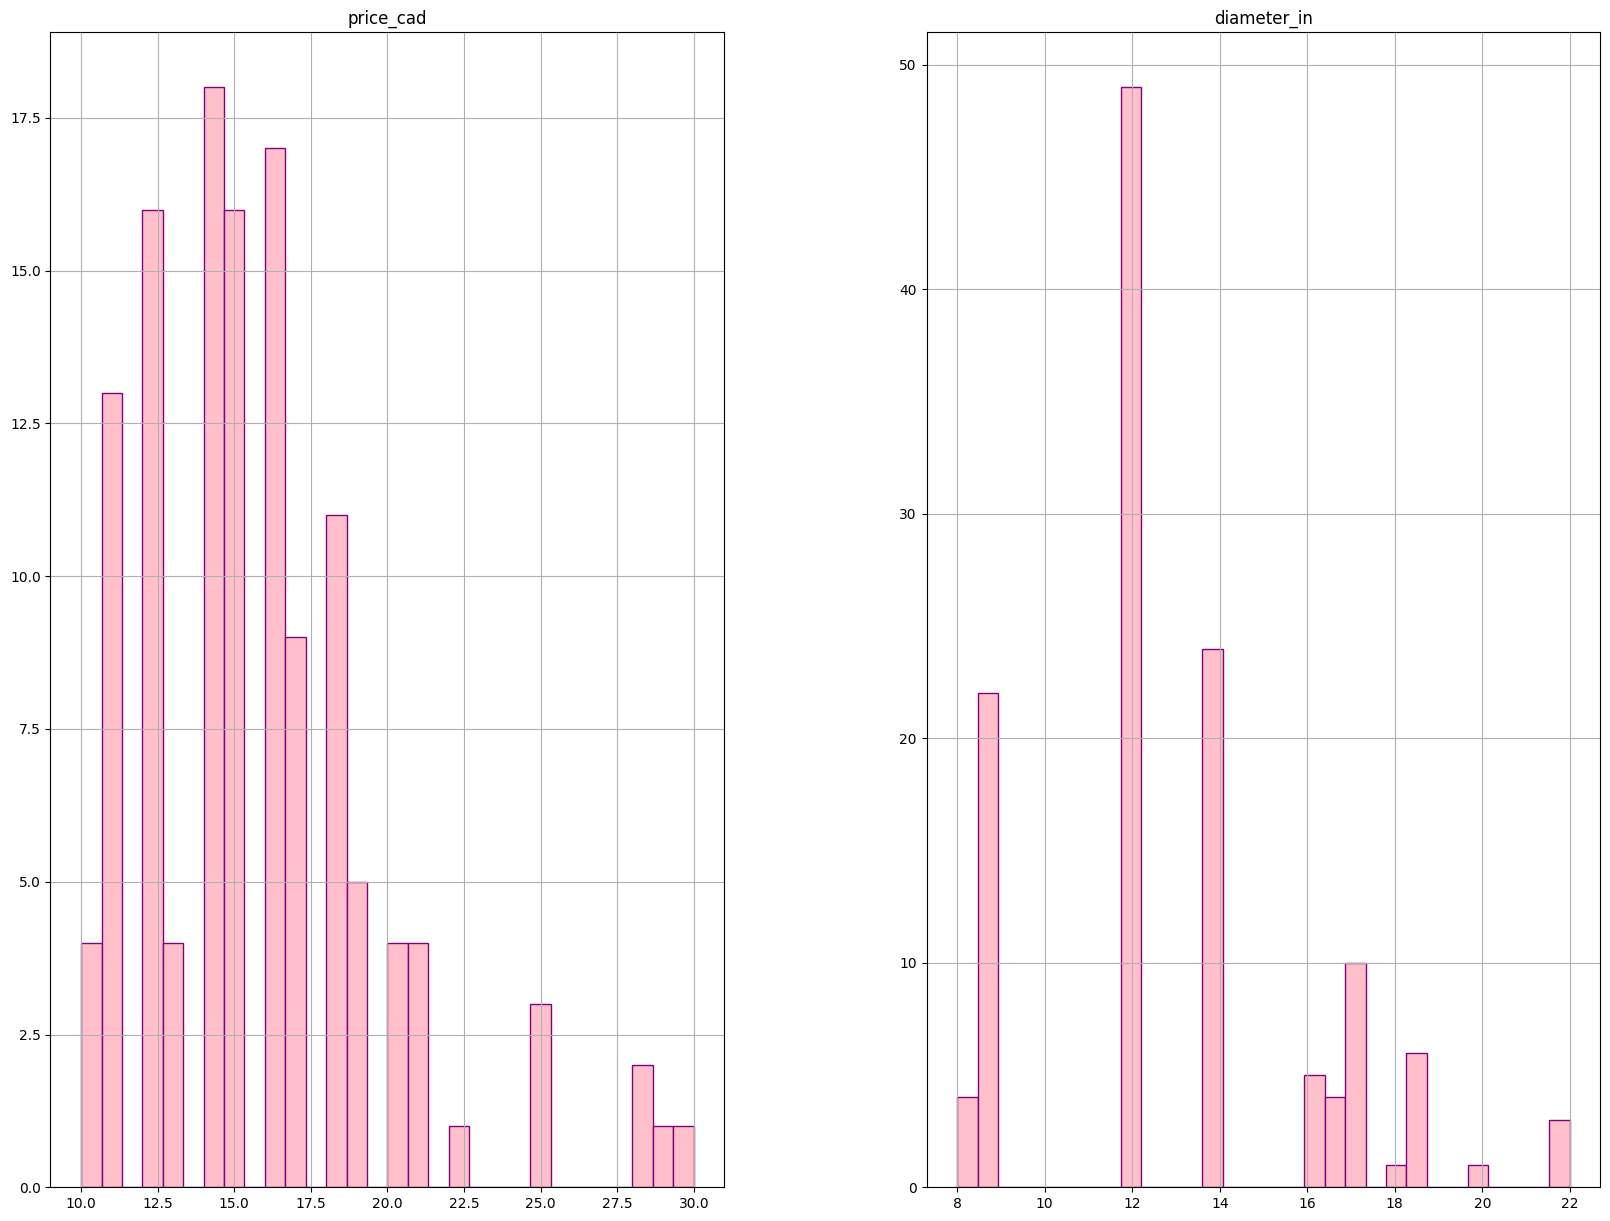

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
pizza.hist(bins=30, figsize=(20,15), color='pink', ec='purple') #changed fill and edge color
plt.show()